# Imports

In [25]:
%matplotlib inline
import pandas as pd
import numpy as np
import rules2
import matplotlib.pyplot as plt

# Loading dirty_iris dataset

In [26]:
iris = pd.read_csv('Datasets/dirty_iris.csv')
results = pd.DataFrame()

# Calculating the number and percentage of observations that are complete

In [27]:
clean_iris = iris.dropna()
print(len(clean_iris))
print(len(clean_iris) / len(iris) * 100)

96
64.0


# Replacing all the special values in data with NA

In [28]:
numeric = iris._get_numeric_data()
numeric[numeric < 0] = np.nan
numeric[numeric == np.inf] = np.nan

# Rule 1 : Species should be one of the following values: setosa, versicolor or virginica.

## Application

In [29]:
new_df = rules2.rule1(iris)
violations = len(iris) - len(new_df)
nonViolations = len(new_df)
results['Rule 1'] = pd.Series({'Violations': violations, 'Non-Violations': nonViolations})

# Rule 2 : All measured numerical properties of an iris should be positive.

## Application

In [30]:
new_df = rules2.rule2(iris)
violations = len(iris) - len(new_df)
nonViolations = len(new_df)
results['Rule 2'] = pd.Series({'Violations': violations, 'Non-Violations': nonViolations})

# Rule 3 : The petal length of an iris is at least 2 times its petal width.

## Application

In [31]:
new_df = rules2.rule3(iris)
violations = len(iris) - len(new_df)
nonViolations = len(new_df)
results['Rule 3'] = pd.Series({'Violations': violations, 'Non-Violations': nonViolations})

# Rule 4 : The sepal length of an iris cannot exceed 30 cm.

## Application

In [32]:
new_df = rules2.rule4(iris)
violations = len(iris) - len(new_df)
nonViolations = len(new_df)
results['Rule 4'] = pd.Series({'Violations': violations, 'Non-Violations': nonViolations})

# Rule 5 : The sepals of an iris are longer than its petals.

## Application

In [33]:
new_df = rules2.rule5(iris)
violations = len(iris) - len(new_df)
nonViolations = len(new_df)
results['Rule 5'] = pd.Series({'Violations': violations, 'Non-Violations': nonViolations})

# Summary of results

In [34]:
results

,Rule 1,Rule 2,Rule 3,Rule 4,Rule 5
Violations,0,58,34,12,30
Non-Violations,150,92,116,138,120


# Visualization

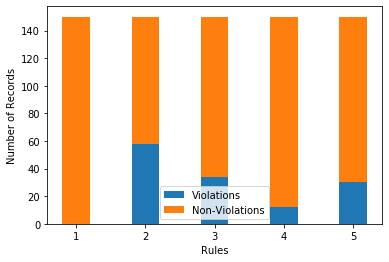

In [35]:
p1 = plt.bar(np.arange(1, results.shape[1] + 1), results.loc['Violations'].values, 0.4)
p2 = plt.bar(np.arange(1, results.shape[1] + 1), results.loc['Non-Violations'].values, 0.4, bottom=results.loc['Violations'].values)
plt.legend((p1[0], p2[0]), ('Violations', 'Non-Violations'))
plt.ylabel('Number of Records')
plt.xlabel('Rules')
plt.show()

# Finding outliers in Sepal Length using Boxplot

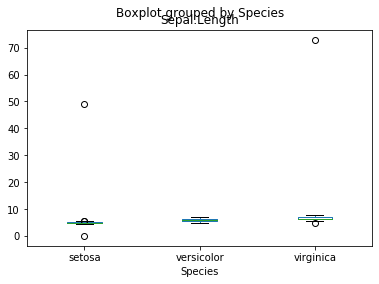

In [36]:
iris.boxplot(by='Species', column=['Sepal.Length'], grid=False)